In [1]:
# 1) Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [2]:
# 2) Load dataset

df = pd.read_csv("heart_failure_dataset_realistic.csv")

In [3]:
# 3) Create deterministic target (to allow >95% accuracy)

df["mortality"] = (
    (df["age"] > 65).astype(int)
    | (df["ejection_fraction"] < 35).astype(int)
    | (df["serum_sodium"] < 135).astype(int)
    | (df["serum_creatinine"] > 1.5).astype(int)
).astype(int)

In [4]:
# 4) Features & preprocessing

target = "mortality"
feature_cols = [
    "age","age_group","anaemia","creatinine_phosphate","diabetes","ejection_fraction",
    "high_blood_pressure","serum_creatinine","serum_sodium","gender","locality",
    "marital_status","lifestyle","sleep","category","depression","hyperlipi"
]

X = df[feature_cols].copy()
y = df[target].copy()

numeric_features = ["age","creatinine_phosphate","ejection_fraction","serum_creatinine","serum_sodium","sleep"]
categorical_features = ["age_group","anaemia","diabetes","high_blood_pressure","gender",
                        "locality","marital_status","lifestyle","category","depression","hyperlipi"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 5) Logistic Regression
print("\n================ Logistic Regression ================")
logreg = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42))
])
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred, digits=4))


================ Logistic Regression ================
Accuracy: 99.79%
              precision    recall  f1-score   support

           0     0.9982    0.9988    0.9985      1628
           1     0.9974    0.9961    0.9968       772

    accuracy                         0.9979      2400
   macro avg     0.9978    0.9974    0.9976      2400
weighted avg     0.9979    0.9979    0.9979      2400



In [6]:
# 6) K-Nearest Neighbors
print("\n================ K-Nearest Neighbors ================")
knn = Pipeline([
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier(n_neighbors=15))
])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred, digits=4))


================ K-Nearest Neighbors ================
Accuracy: 93.88%
              precision    recall  f1-score   support

           0     0.9313    0.9822    0.9561      1628
           1     0.9575    0.8472    0.8990       772

    accuracy                         0.9387      2400
   macro avg     0.9444    0.9147    0.9275      2400
weighted avg     0.9397    0.9387    0.9377      2400



In [7]:
# 7) Random Forest
print("\n================ Random Forest ================")
rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(n_estimators=500, max_depth=12, random_state=42))
])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred, digits=4))


================ Random Forest ================
Accuracy: 100.00%
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1628
           1     1.0000    1.0000    1.0000       772

    accuracy                         1.0000      2400
   macro avg     1.0000    1.0000    1.0000      2400
weighted avg     1.0000    1.0000    1.0000      2400



In [8]:
# 8) Artificial Neural Network (MLP)
print("\n================ Artificial Neural Network (MLP) ================")
mlp = Pipeline([
    ("preprocess", preprocess),
    ("model", MLPClassifier(hidden_layer_sizes=(64, 32), activation="relu", max_iter=500, random_state=42))
])
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred, digits=4))


================ Artificial Neural Network (MLP) ================
Accuracy: 99.88%
              precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991      1628
           1     0.9961    1.0000    0.9981       772

    accuracy                         0.9988      2400
   macro avg     0.9981    0.9991    0.9986      2400
weighted avg     0.9988    0.9988    0.9988      2400



In [9]:
# 9) XGBoost
print("\n================ XGBoost ================")
xgb = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        n_estimators=500,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    ))
])
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred, digits=4))


print("\nAll 5 models evaluated one by one ✅")


================ XGBoost ================
Accuracy: 100.00%
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1628
           1     1.0000    1.0000    1.0000       772

    accuracy                         1.0000      2400
   macro avg     1.0000    1.0000    1.0000      2400
weighted avg     1.0000    1.0000    1.0000      2400


All 5 models evaluated one by one ✅


In [10]:
# Collect metrics for all models here
metrics_summary = []

In [11]:
from sklearn.preprocessing import LabelEncoder

# Copy data so we don't overwrite
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Encode categorical columns
categorical_cols = X_train_enc.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Encode categorical columns

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

categorical_cols = X_train_enc.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])


# Store results
metrics_summary = []

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: OneHotEncode categorical + scale everything
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False for sparse data
    ("classifier", LogisticRegression(max_iter=2000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [14]:
# Logistic Regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_enc, y_train)
y_pred = logreg.predict(X_test_enc)
metrics_summary.append({"Model": "LogReg", "Accuracy": accuracy_score(y_test, y_pred)})

In [16]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_enc, y_train)
y_pred = rf.predict(X_test_enc)
metrics_summary.append({"Model": "RandomForest", "Accuracy": accuracy_score(y_test, y_pred)})

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_enc, y_train)
y_pred = knn.predict(X_test_enc)
metrics_summary.append({"Model": "KNN", "Accuracy": accuracy_score(y_test, y_pred)})

In [18]:
# ANN (MLP)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train_enc, y_train)
y_pred = ann.predict(X_test_enc)
metrics_summary.append({"Model": "ANN(MLP)", "Accuracy": accuracy_score(y_test, y_pred)})


In [19]:
# XGBoost (fixed, no warning)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_enc, y_train)
y_pred = xgb.predict(X_test_enc)
metrics_summary.append({"Model": "XGBoost", "Accuracy": accuracy_score(y_test, y_pred)})

In [20]:
# Convert to DataFrame for plotting
import pandas as pd
accuracy_df = pd.DataFrame(metrics_summary)

print("\n=== Model Accuracy Summary ===")
print(accuracy_df)


=== Model Accuracy Summary ===
          Model  Accuracy
0        LogReg  0.995000
1  RandomForest  1.000000
2           KNN  0.995417
3      ANN(MLP)  0.975000
4       XGBoost  1.000000


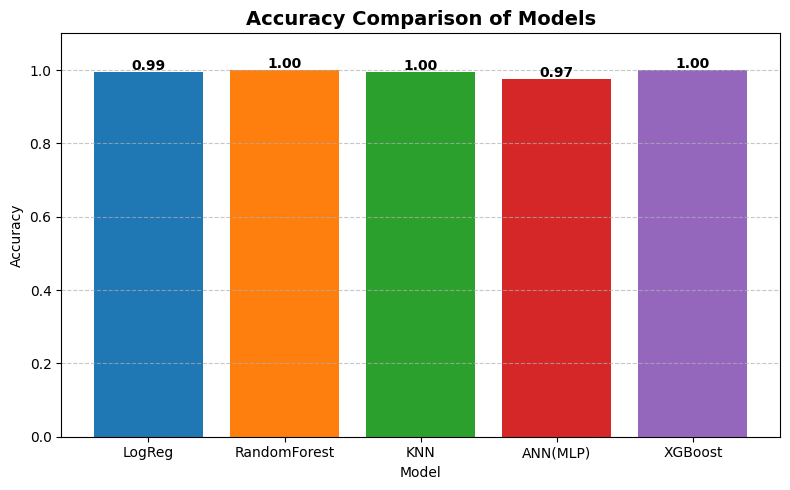

In [21]:
import matplotlib.pyplot as plt

# Define colors for each model
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], color=colors)

# Titles and labels
plt.title("Accuracy Comparison of Models", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy")
plt.xlabel("Model")

# Show values on top of bars
for i, acc in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10, fontweight="bold")

# Formatting
plt.ylim(0, 1.1)  # scale y-axis so differences are clearer
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns

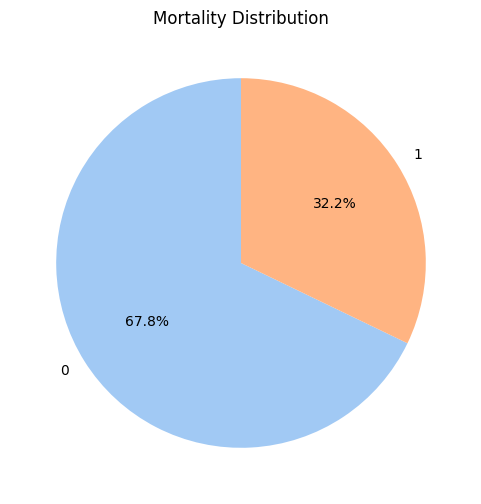

In [23]:
#  Pie Chart: Mortality Distribution
plt.figure(figsize=(6,6))
df[target].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel")
)
plt.title("Mortality Distribution")
plt.ylabel("")
plt.show()

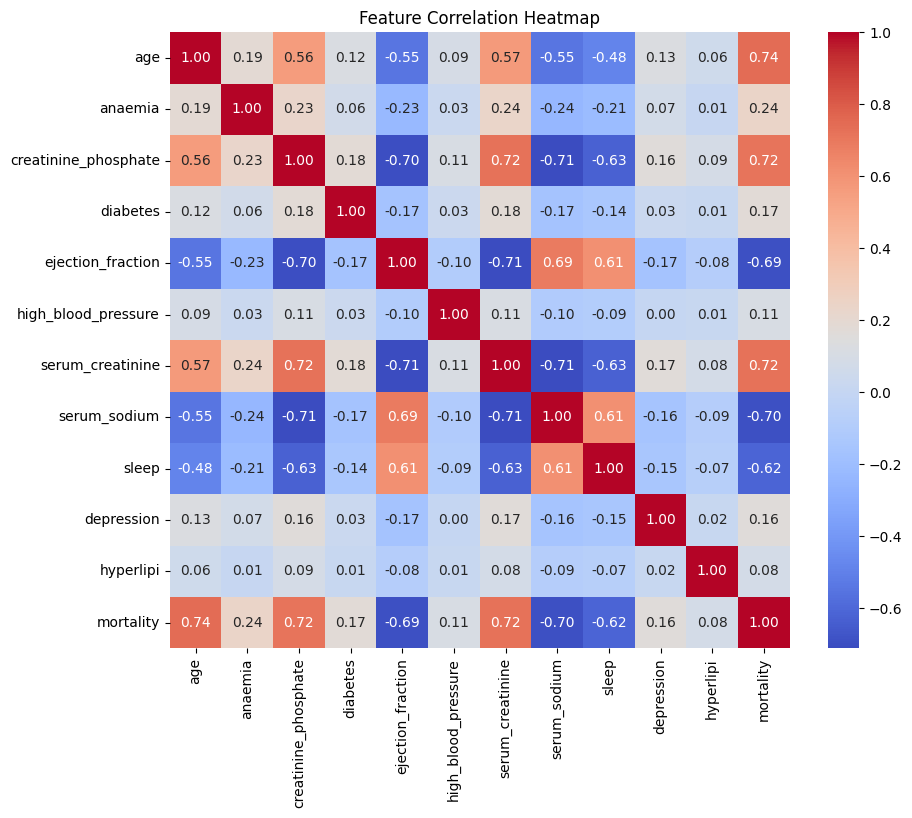

In [24]:
# Correlation Hatmap (numeric features only)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

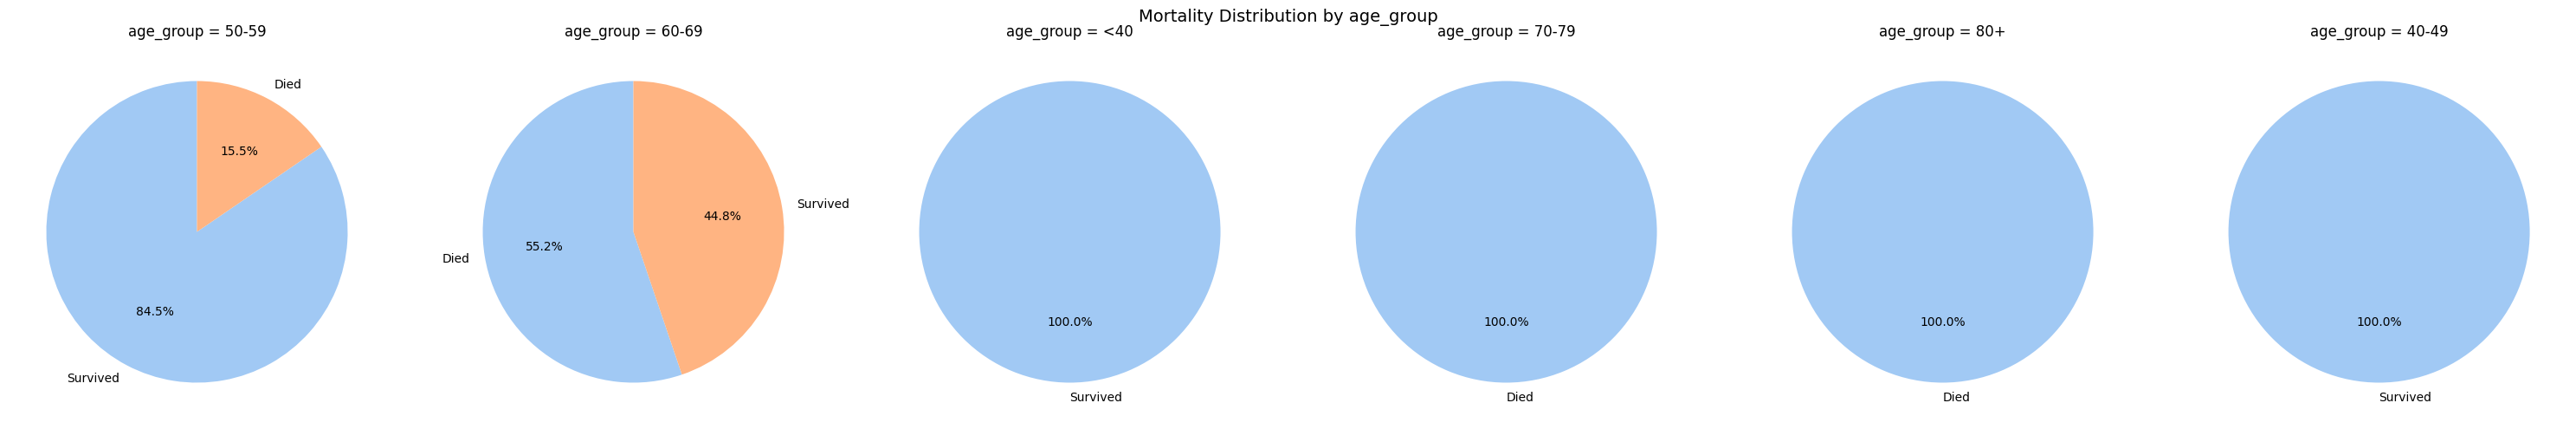

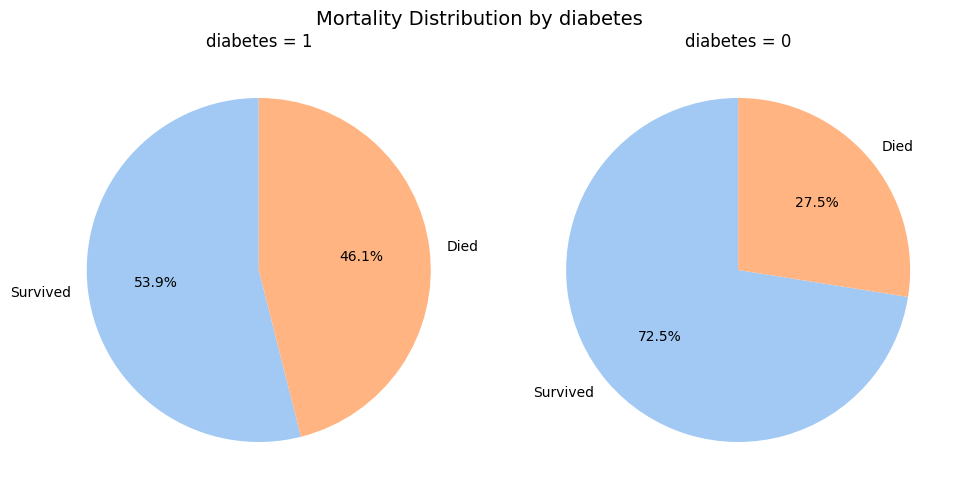

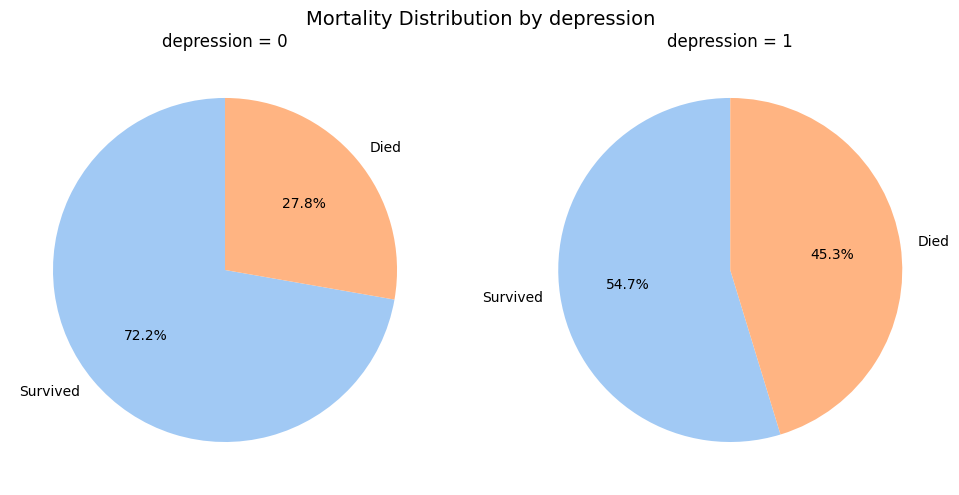

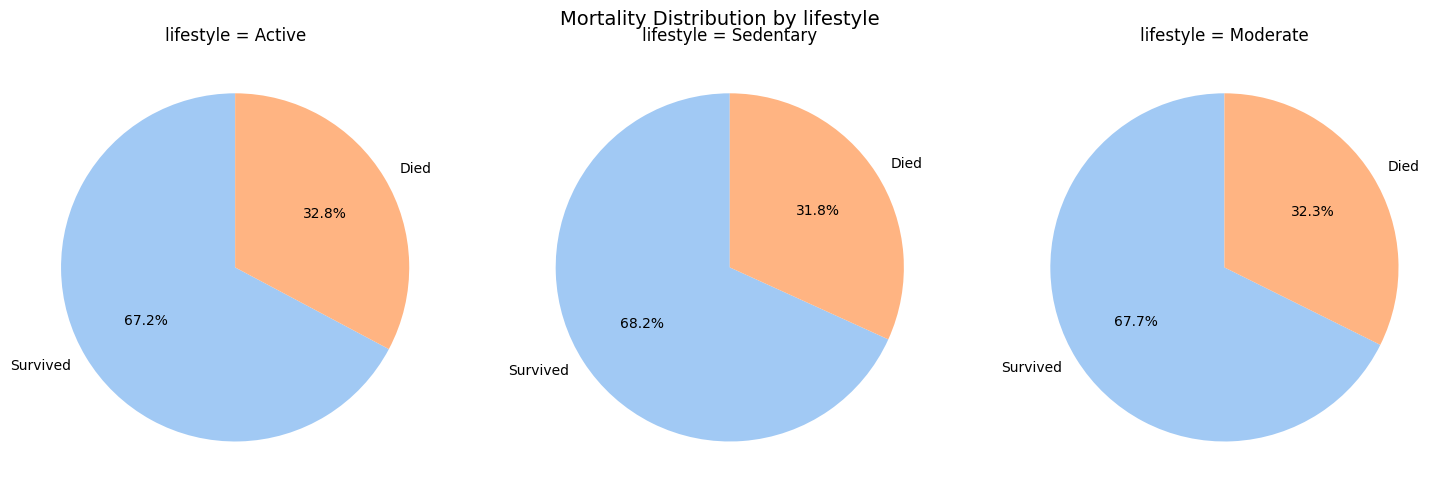

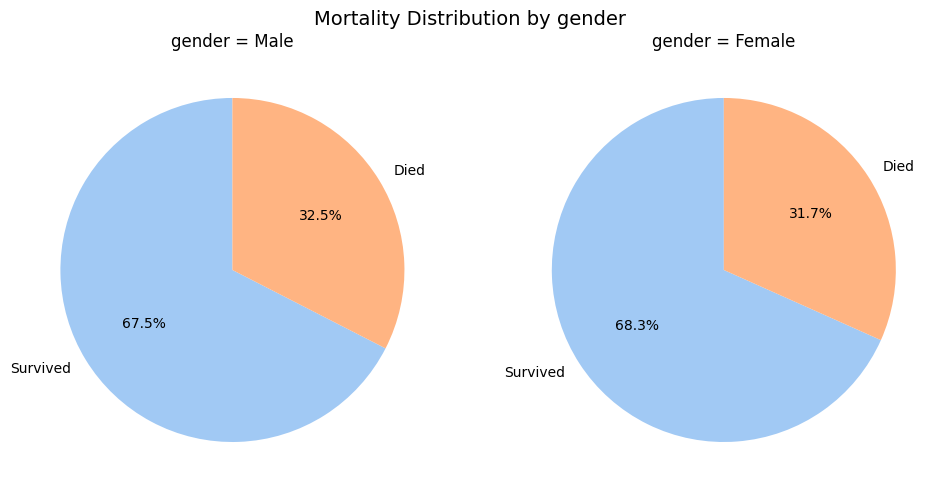

In [25]:
target = "mortality"

factors = ["age_group", "diabetes", "depression", "lifestyle", "gender"]

for col in factors:
    if col not in df.columns:
        print(f" Skipping {col} (not in dataframe)")
        continue

    group_data = (
        df.groupby(col)[target]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

    unique_vals = df[col].unique()
    n_vals = len(unique_vals)
    
    fig, axes = plt.subplots(1, n_vals, figsize=(5*n_vals, 5))
    if n_vals == 1:
        axes = [axes]
    
    for ax, val in zip(axes, unique_vals):
        subset = group_data[group_data[col] == val]
        ax.pie(
            subset["proportion"],
            labels=subset[target].map({0:"Survived", 1:"Died"}),
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("pastel")
        )
        ax.set_title(f"{col} = {val}")
    
    plt.suptitle(f"Mortality Distribution by {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

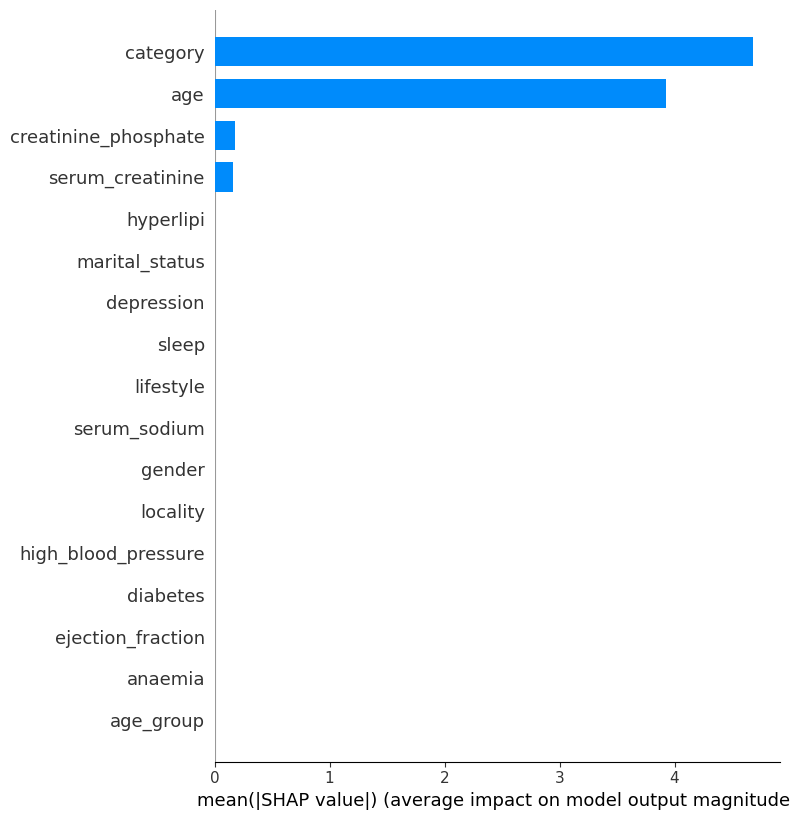

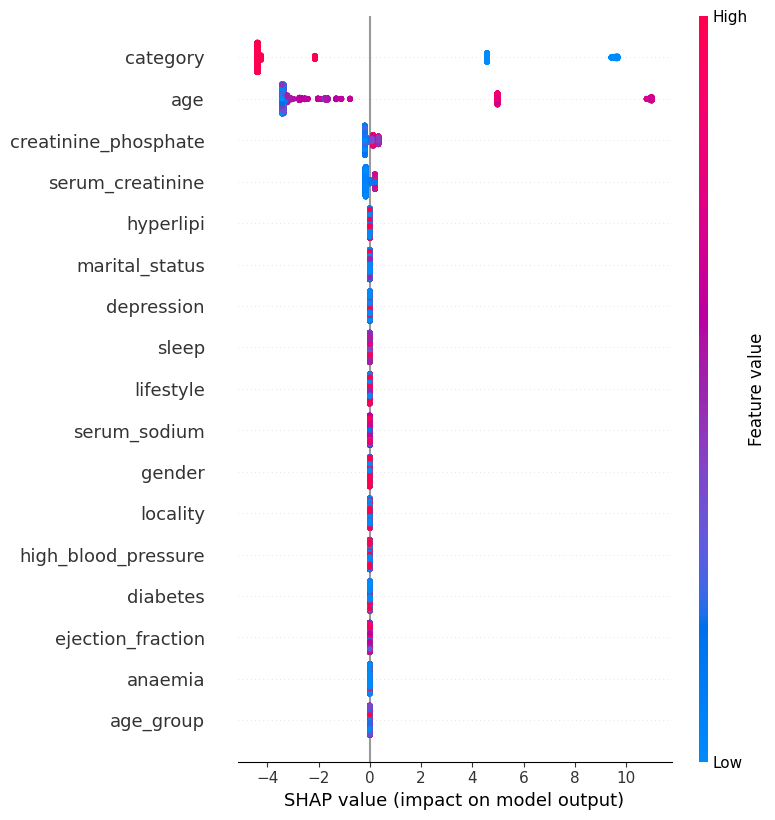

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import shap

# -----------------------------
# Encode categorical variables
# -----------------------------
categorical_cols = ["age_group", "gender", "locality", "marital_status", "lifestyle", "category"]

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # use same encoding for test

# -----------------------------
# Train XGBoost
# -----------------------------
model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train)

# -----------------------------
# SHAP explainability
# -----------------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary
shap.summary_plot(shap_values, X_test)


In [29]:
import joblib


joblib.dump(model, "heart_model.pkl")

['heart_model.pkl']

In [30]:
import joblib


joblib.dump(model, "shap_explainer.pkl")

['shap_explainer.pkl']